In [18]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

#데이터 가져오기
diabetes = load_diabetes()
df_x=pd.DataFrame(diabetes.data, columns=diabetes.feature_names).values
df_y=pd.Series(diabetes.target, name="target").values

#df_x.shape

Iteration 3000 : Loss 2979.0941
2870.409642568435


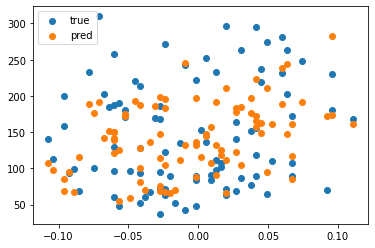

In [23]:
# train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# 모델 초기화
np.random.seed(1)
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수 정의
def model(X, W, b):
    predictions = np.dot(X, W) + b
    return predictions

# 손실 함수 계산
def loss(X, W, b, y):
    predictions = model(X, W, b)
    return ((predictions - y) ** 2).mean()

# 기울기 계산
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * np.dot(X.T, y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

# 학습률 설정
LEARNING_RATE = 0.1

# 손실 값 기록을 위한 리스트
losses = []

# 학습 과정
for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
print('Iteration %d : Loss %0.4f' % (i, L))


y_pred_test= model(X_test,W,b)
test_loss = loss(X_test,W,b,y_test)

print(test_loss)

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred_test, label="pred")
plt.legend()
plt.show()


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 가져오기 및 전처리(datetime 열을 날짜와 시간 형식으로 변환 및
# year, month, day, hour, minute, second 열을 생성하여 날짜 및 시간 정보 저장

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

# 'datetime' 컬럼을 datetime 자료형으로 변환

train['datetime'] = pd.to_datetime(train['datetime'])
# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.columns.to_list()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

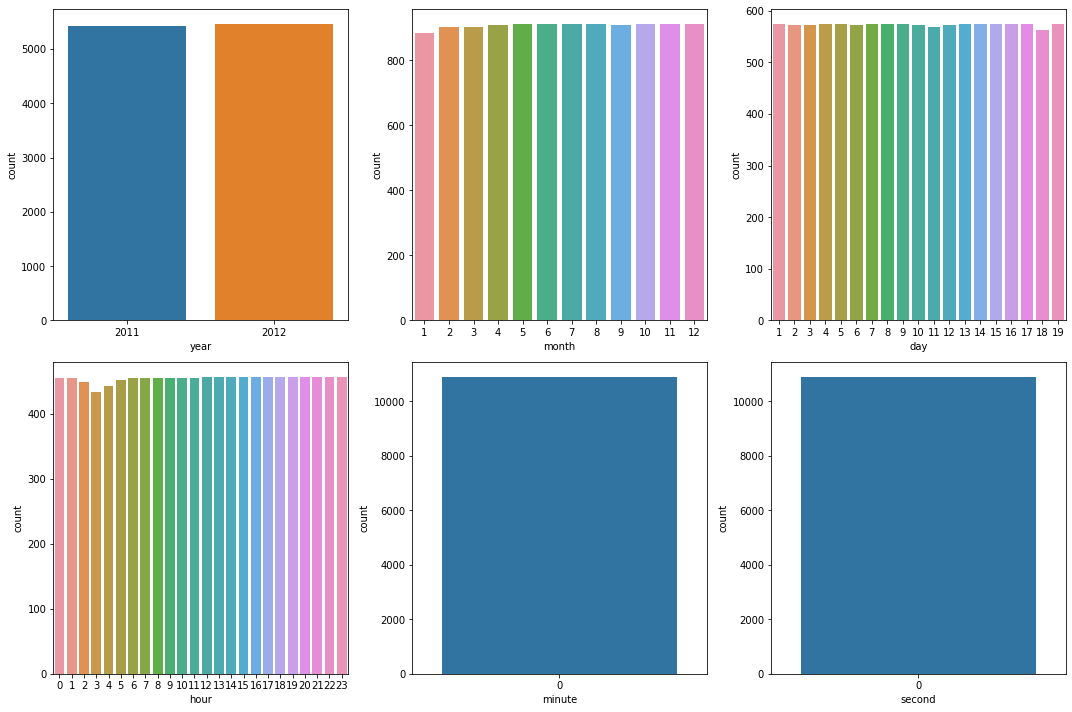

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])
plt.tight_layout()
plt.show()

In [29]:
X_columns = ['season',
 'holiday',
 'temp',
'humidity',
 'atemp',
 'year',
 'month',
 'day',
 'hour'] # 선택할 특성 컬럼

y_column = 'count'  # 예측할 타겟 컬럼

X = train[X_columns]
y = train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#선형회귀
model = LinearRegression()
model.fit(X_train, y_train)


#예측값, 손실함수 계산
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


[254.20081791  51.8550593  204.89840964 ... 206.25568073 306.9632602
 -92.8492177 ]
Mean Squared Error: 19986.619510877175
Root Mean Squared Error: 141.37404114927597


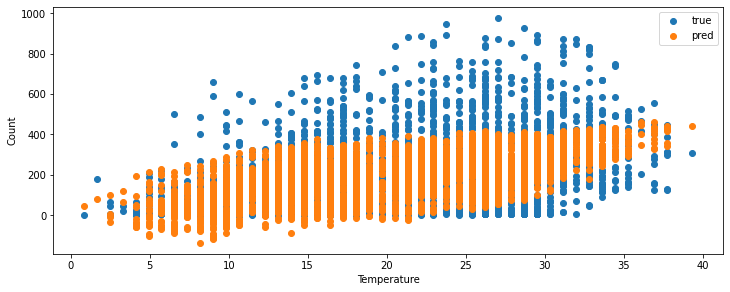

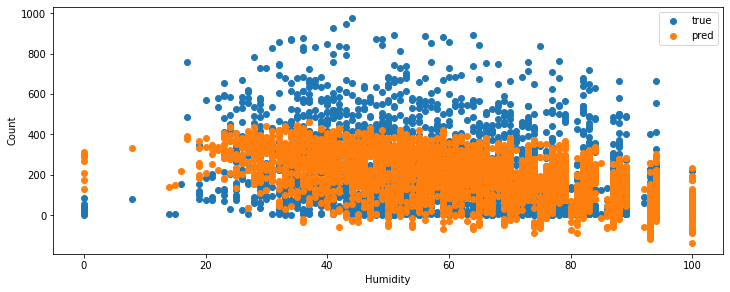

In [31]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], y_pred, label="pred")
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()

## 회고(작성자 : 이서영)
----
### 프로젝트의 개요
> * 모델을 학습시키고 당뇨병에 대한 예측과 자전거 대여량을 예측한다. 

### 어려웠던 점
> * 처음 진행하면서 편미분과 수치미분(중앙 차분, 전방차분)에 대한 개념들을 오랜만에 들어서 헷갈리는 내용도 많았다.
> * 이것과는 별개로 손실함수에 대해서 따로 정리하던 중 mse나 rmse가 아닌 Binary Crossentropy, Categroical Crossentropy에 대한 내용들이 어려웠다

### 학습한 내용
> * 본 노드에서 모델에 적합한 매개변수들(가중치, 편향)등을 어떠한 알고리즘 등으로 찾는지에 대하여 학습하였고, 해당 알고리즘의 수식이나 구현하기 위한 코드들에 대해서도 학습하였다. 

### 알아간 점
> * 손실함수에 대해서 rmse나 mse에 대해서만 사용하고 나머지는 거의 사용해보지 않은 내용들에 대해서 알게 되었으며, 경사하강법 중 미니배치 경사하강법과, 배치경사 하강법이 있다는 것을 알게 되었다.
> * 또한 모델에서 학습을 시키고 연산을 수행 시 차원이 맞지 않았을 경우 맞추는 방법에 대해서도 알게 되었다.

### 모호한점
> * 기울기를 미분으로 구할 때 수식에 대한 증명중 모호한 점이 있어서 다시 정리할 예정이다.
### 평가지표를 맞추기 위하여 노력한 점
> * 1. 1번 프로젝트에서 LEARNING_RATE를 알기 위하여 1~0.001까지 많은 값들을 사용하였으며, loss를 줄이기 위해 for문을 3000까지 하였으며, 또한 난수를 지정하였다.
> * 2. 2번 프로젝트에서는 학습시키는 열값들을 알기 위하여 데이터에 어떠한 열값들이 영향을 미치는지에 대해서 생각하였고 생각한 열들을 뺴보면서 rmse값을 확인 하였다.
       
